# Shapley Additive Explanations


## Shapley values
Shapley additive explanations (SHAP) is a method to explain individual predictions of machine learning models by attributing the output of a model to its input features {cite}`lundberg2017unified`. It is based on cooperative game theory and provides a way to fairly distribute the "payout" (prediction) among the "players" (features).

In cooperative game theory, the Shapley value is used to distribute the total gains to players based on their contributions {cite}`winter2002shapley`. For a set of features $N$ and a prediction function $f$, the Shapley value $\phi_i$ for feature $i$ is defined as:

\begin{equation} 
    \phi_i(f) = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|!(|N| - |S| - 1)!}{|N|!} \left[ f(S \cup \{i\}) - f(S) \right]
\end{equation}

where:
- $S$ is a subset of features not including $i$.
- $f(S)$ is the prediction function evaluated with features in $S$ present and others absent.
- $|S|$ is the number of features in subset $S$.
- $|N|$ is the total number of features.


This formula calculates the **contribution of a specific feature to the model's prediction** by averaging how much the prediction changes when the feature is added to all possible combinations of other features, with each combination weighted to ensure fairness.


## A Simple Example

Let's make an example to understand how this formula works in practice. Imagine a scenario where different power plants contribute to the total electricity generation. We want to fairly distribute the revenue generated from selling electricity among these power plants based on their contribution to the total electricity generation.

Let's say we have power plants $A$, $B$, and $C$. The total revenue from selling electricity is influenced by the contribution of each power plant. Then, we have that
- $N$ is the set of all power plants, $N = \{A, B, C\}$.
- $S$ is a subset of power plants.
- $f(S)$ is the revenue generated by the subset $S$ of power plants.
- $\phi_i(f)$ is the Shapley value for power plant $i$, representing its fair share of the total revenue.


### Step-by-Step Procedure

1. **Identify all subsets without plant $A$**: the possible subsets $S$ without $A$ are: {}, \{B\}, \{C\}, and \{B, C\}.

2. **Marginal contribution of adding plant $A$**: for each subset $S$, calculate the additional revenue generated by adding plant $A$ to $S$.

3. **Calculate marginal contributions**: the impact of adding a specific plant (or feature) to a subset of other plants (or features) in terms of the change in the power production (or model's prediction). Essentially, they quantify how much the outcome changes when a particular plant is added to different groups of other plants. We will compute one marginsal contribution for each subset:
   - For {}: $f(\{A\}) - f(\{\})$
   - For \{B\}: $f(\{A, B\}) - f(\{B\})$
   - For \{C\}: $f(\{A, C\}) - f(\{C\})$
   - For \{B, C\}: $f(\{A, B, C\}) - f(\{B, C\})$

4. **Weight Each Contribution**: the weight for each marginal contribution is
   \begin{equation}
       \frac{|S|!(|N| - |S| - 1)!}{|N|!}
   \end{equation}
   It ensures that the contribution of each feature is averaged fairly across all possible combinations of features:
   - $|S|!$ is the factorial of the size of the subset $S$, and represents the number of ways to arrange the features in subset $S$.
   - $(|N| - |S| - 1)!$ is the factorial of the number of features not in subset $S$ or the feature $i$ being evaluated, and represents the number of ways to arrange the remaining features excluding the feature $i$.
   - $|N|!$ is the factorial of the total number of features, and represents the total number of ways to arrange all the features.


Let's compute the Shapley value for plant $A$:

\begin{equation} \phi_A(f) = \sum_{S \subseteq N \setminus \{A\}} \frac{|S|!(|N| - |S| - 1)!}{|N|!} \left[ f(S \cup \{A\}) - f(S) \right] \end{equation}

Where:
- $|N| = 3$ (total number of power plants)
- $|S|$ is the size of subset $S$

Breaking it down for each subset $S$:

1. **For $S = \{\}$**:
   - $|S| = 0$
   - Marginal contribution: $f(\{A\}) - f(\{\})$
   - Weight: $\frac{0!(3-0-1)!}{3!} = \frac{1 \cdot 2}{6} = \frac{1}{3}$

2. **For $S = \{B\}$**:
   - $|S| = 1$
   - Marginal contribution: $f(\{A, B\}) - f(\{B\})$
   - Weight: $\frac{1!(3-1-1)!}{3!} = \frac{1 \cdot 1}{6} = \frac{1}{6}$

3. **For $S = \{C\}$**:
   - $|S| = 1$
   - Marginal contribution: $f(\{A, C\}) - f(\{C\})$
   - Weight: $\frac{1!(3-1-1)!}{3!} = \frac{1 \cdot 1}{6} = \frac{1}{6}$

4. **For $S = \{B, C\}$**:
   - $|S| = 2$
   - Marginal contribution: $f(\{A, B, C\}) - f(\{B, C\})$
   - Weight: $\frac{2!(3-2-1)!}{3!} = \frac{2 \cdot 1}{6} = \frac{1}{3}$


Once we have the weights for the possible subsets (or coalitions), we can **sum up the contributions**:

\begin{equation}
    \phi_A(f) = \frac{1}{3} \left[ f(\{A\}) - f(\{\}) \right] + \frac{1}{6} \left[ f(\{A, B\}) - f(\{B\}) \right] + \frac{1}{6} \left[ f(\{A, C\}) - f(\{C\}) \right] + \frac{1}{3} \left[ f(\{A, B, C\}) - f(\{B, C\}) \right]
\end{equation}

The Shapley value $\phi_A(f)$ represents the fair share of revenue that power plant $A$ should receive based on its contribution to the total revenue generated, considering all possible combinations of power plants. By applying this process, we can similarly calculate the Shapley values for power plants $B$ and $C$, ensuring that each plant receives a fair share of the revenue based on its contribution to the overall electricity generation.


## Connection between Shapley values and SHAP

Shapley values come from cooperative game theory and provide a way to fairly distribute the total gain (e.g., revenue) among players (e.g., power plants). The Shapley value for each player (feature) is calculated based on the average marginal contribution of that player across all possible subsets of players. Instead, SHAP adapts Shapley values to explain the output of machine learning models. It provides a way to understand how each feature contributes to an individual prediction. SHAP uses the same principles as Shapley values but applies them in the context of model predictions. We just have to consider the prediction of a machine learning model as the "total gain" in a cooperative game, and the features of the model are the "players" contributing to the prediction.

## Practical SHAP implementation

1. **Model training**: train your machine learning model on your data.

2. **SHAP explainer**: use a SHAP explainer to compute SHAP values for the trained model. SHAP explainers are designed to efficiently compute the Shapley values for machine learning models. The SHAP library provides different types of explainers such as KernelExplainer, TreeExplainer, and DeepExplainer, depending on the model type.

3. **Compute SHAP values**: for a given instance $x$, compute the SHAP values for all features. These values indicate the contribution of each feature to the prediction.


Let's now **generate some data** to apply SHAP, as we did for PDPs and ALEs.

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

# Simulate data
np.random.seed(0)
n_samples = 1000
temperature = np.random.uniform(0, 40, n_samples)  # Temperature in Celsius
time_of_day = np.random.uniform(0, 24, n_samples)  # Time of day in hours
day_of_week = np.random.randint(0, 7, n_samples)  # Day of the week (0=Sunday, 6=Saturday)

price = (0.1 * (temperature - 20)**2 +
         5 * np.sin((time_of_day - 7) * np.pi / 6) * (time_of_day >= 7) * (time_of_day <= 10) +
         5 * np.sin((time_of_day - 18) * np.pi / 4) * (time_of_day >= 18) * (time_of_day <= 22) +
         -5 * np.sin((time_of_day - 10) * np.pi / 7) * (time_of_day >= 10) * (time_of_day <= 17) +
         7 * np.sin((time_of_day) * np.pi / 24) +
         5 * (day_of_week == 0) +
         np.random.normal(0, 2, n_samples) * 2)

data = pd.DataFrame({
    'Temperature': temperature,
    'Hour': time_of_day,
    'Day': day_of_week,
    'Price': price
})

data.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Temperature,Hour,Day,Price
0,21.952540,14.229126,3,-2.562450
1,28.607575,0.241529,3,7.237870
2,24.110535,11.419829,3,5.621266
3,21.795327,17.010489,5,6.220472
4,16.946192,1.055410,4,-2.435281


We can then train a random forest model on the data we just generated and then apply SHAP to explain its predictions.

In [2]:
from sklearn.ensemble import RandomForestRegressor

# Split data into features and target
X = data[['Temperature', 'Hour', 'Day']]
y = data['Price']

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)

RandomForestRegressor(random_state=0)

We can implement SHAP for the random forest using the `TreeExplainer` function from the `shap` library:

In [3]:
import shap

# Use SHAP to explain the model predictions
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

ModuleNotFoundError: No module named 'shap'

Then, we can visualize the results using the **summary plot**, which shows the distribution of Shapley values for all features across the dataset.

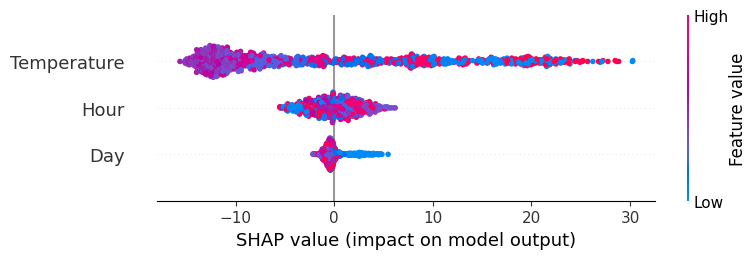

In [15]:
# Summary plot for all instances
shap.summary_plot(shap_values, X, plot_type="dot")

The **dependence plot** highlights how a specific feature (e.g., Temperature) influences the prediction.

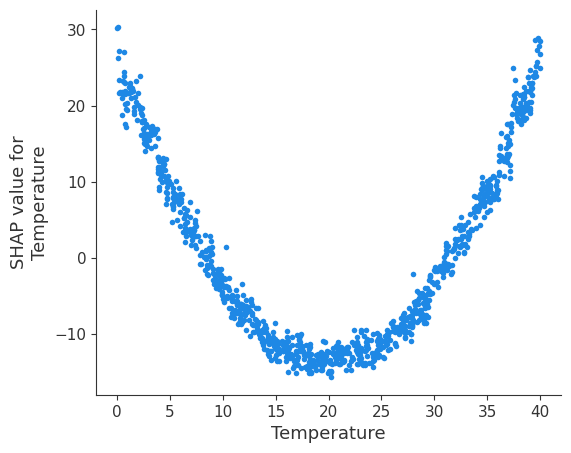

In [11]:
# Dependence plot for a specific feature without interaction feature
shap.dependence_plot('Temperature', shap_values, X, interaction_index=None)

We can also see the same plot including the interaction between Temperature and Hour:

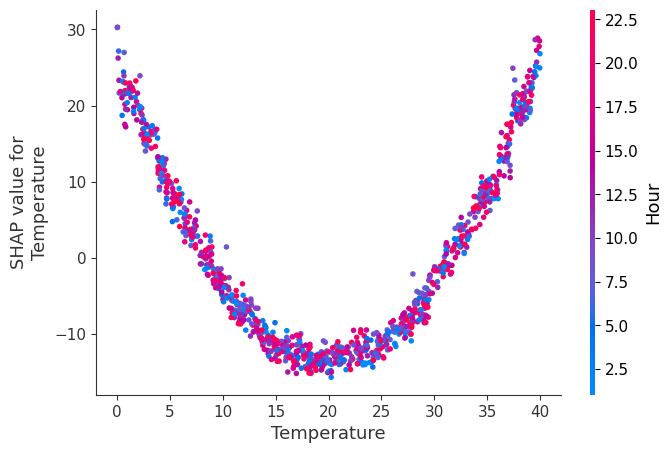

In [20]:
# Dependence plot for a specific feature with interaction
shap.dependence_plot('Temperature', shap_values, X, interaction_index='Hour')

Then, we can also plot the dependence plots for Hour and Day, to see if SHAP is able to unveil the daily and weekly profiles.

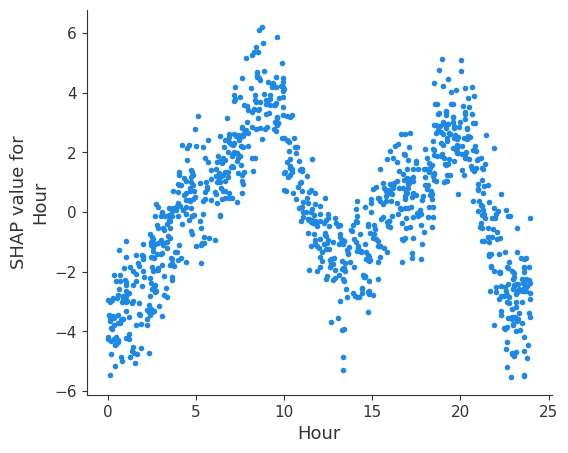

In [21]:
# Dependence plot for a specific feature
shap.dependence_plot('Hour', shap_values, X, interaction_index=None)

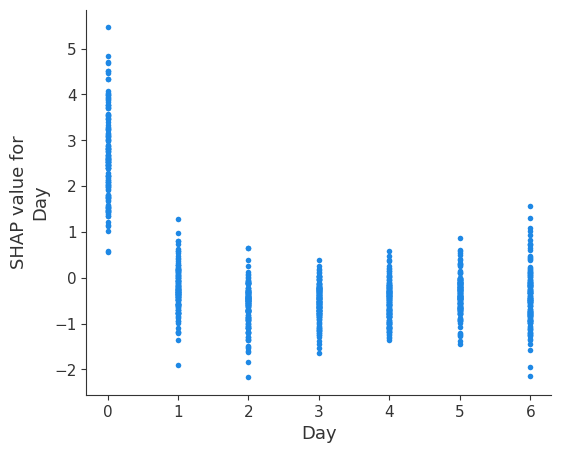

In [22]:
# Dependence plot for a specific feature
shap.dependence_plot('Day', shap_values, X, interaction_index=None)

Shapley values offer a robust method for interpreting machine learning models by providing a fair and comprehensive attribution of feature contributions to individual predictions. In the context of electricity markets, this can help stakeholders understand the impact of various factors on electricity prices and make more informed decisions.